Predicted focal length (scale): 1109.043212890625 px


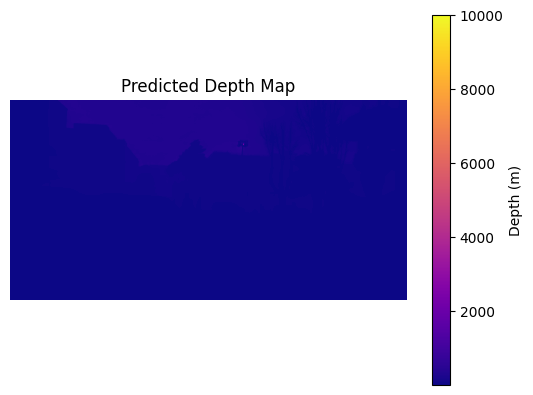

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import depth_pro
import torch

# Set the device to the desired GPU index (e.g., 0, 1, 2)
device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")

# Load model and move to device
model, transform = depth_pro.create_model_and_transforms()
model.to(device)
model.eval()

# image_path = "/datasets/vbr_slam/spagna/spagna_train0_kitti/camera_left/data/0000009781.png"
image_path="/datasets/vbr_slam/campus/campus_train0_kitti/camera_left/data/0000010740.png"
# Load and preprocess an image
image, _, f_px = depth_pro.load_rgb(image_path)


image_t = transform(image).to(device)  # Move image tensor to device

# Run inference on the selected device
prediction = model.infer(image_t, f_px=f_px)
depth = prediction["depth"]
focal_length_px = prediction["focallength_px"]


# Print focal length scale
print(f"Predicted focal length (scale): {focal_length_px} px")
depth_cpu = depth.cpu().numpy()  # Move tensor to CPU and convert to numpy

plt.imshow(depth_cpu, cmap='plasma')
plt.colorbar(label='Depth (m)')
plt.title('Predicted Depth Map')
plt.axis('off')
plt.show()



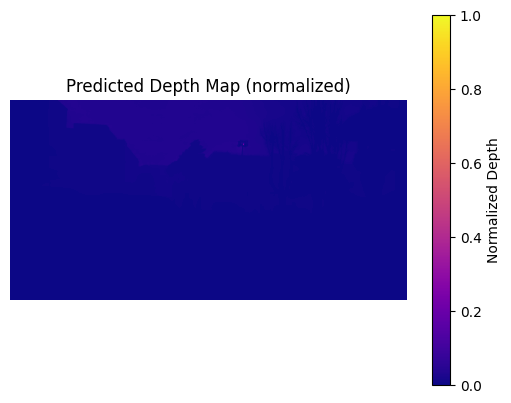

In [7]:
depth_cpu = depth.cpu().numpy()
depth_norm = (depth_cpu - depth_cpu.min()) / (depth_cpu.max() - depth_cpu.min())

plt.imshow(depth_norm, cmap='plasma')
plt.colorbar(label='Normalized Depth')
plt.title('Predicted Depth Map (normalized)')
plt.axis('off')
plt.show()


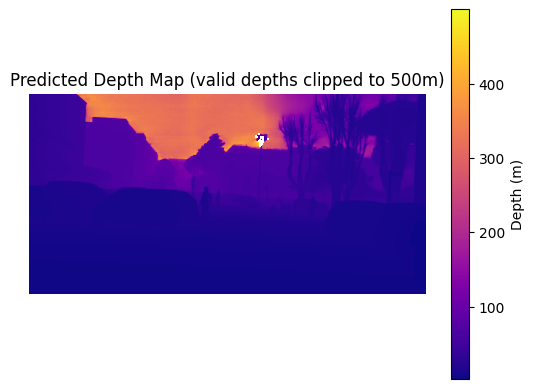

Valid depth stats: min 2.59, max 499.88, mean 63.72


In [12]:
import numpy as np
import matplotlib.pyplot as plt

depth_cpu = depth.cpu().numpy()

# Mask out invalid or excessively large depths (above 500 meters)
valid_mask = depth_cpu < 500

# Replace invalid depths with NaN for visualization
depth_cpu_clipped = np.where(valid_mask, depth_cpu, np.nan)

# Optionally clip to 0-500 for consistent color scaling
depth_vis = np.clip(depth_cpu_clipped, 0, 500)

plt.imshow(depth_vis, cmap='plasma')
plt.colorbar(label='Depth (m)')
plt.title('Predicted Depth Map (valid depths clipped to 500m)')
plt.axis('off')
plt.show()

print(f"Valid depth stats: min {np.nanmin(depth_vis):.2f}, max {np.nanmax(depth_vis):.2f}, mean {np.nanmean(depth_vis):.2f}")


In [13]:
print(depth_cpu.shape)

(700, 1388)
